In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV,
                                     train_test_split)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [26]:
def mse(x, y):
    summation = 0
    n = len(y)
    for i in range(0, n):
        difference = y[i] - x[i]
        squared_difference = difference ** 2
        summation = summation + squared_difference
    return summation / n


def correlation(x, y):
    mean_x = sum(x) / float(len(x))
    mean_y = sum(y) / float(len(y))

    sub_x = [i - mean_x for i in x]

    sub_y = [i - mean_y for i in y]
    numerator = sum([sub_x[i] * sub_y[i] for i in range(len(sub_x))])

    std_deviation_x = sum([sub_x[i] ** 2.0 for i in range(len(sub_x))])
    std_deviation_y = sum([sub_y[i] ** 2.0 for i in range(len(sub_y))])

    denominator = (std_deviation_x * std_deviation_y) ** 0.5
    cor = numerator / denominator
    return cor

def train_test_split(data):
    train_size = int(len(data) * 0.2)
    train_df = data[:train_size:]
    test_df = data[train_size:]
    return train_df, test_df, data.keys()

def calcDistancs(pointA, pointB, numOfFeature):
    tmp = 0
    for i in range(numOfFeature):
        tmp += (float(pointA[i]) - float(pointB[i])) ** 2
    return math.sqrt(tmp)


def kNearestNeighbor(train_data, point, k):
    distances = []
    for row in train_data.values:
        distances.append({"label": row[-1], "value": calcDistancs(row, point, len(train_data.columns))})
    distances.sort(key=lambda x: x["value"])
    labels = [value["label"] for value in distances]
    return labels[:k]


def findMostOccur(arr):
    labels = set(arr)
    ans = ""
    maxOccur = 0
    for label in labels:
        num = arr.count(label)
        if num > maxOccur:
            maxOccur = num
            ans = label
    return ans

In [27]:
data = pd.read_csv('D:/Workspace/BTL_IoT/heart_dataset.csv')

data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [28]:
data = data.drop("id", axis=1)

data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [29]:
data["age"] = np.round(data["age"] / 365)
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


In [30]:
data.tail()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,53.0,2,168,76.0,120,80,1,1,1,0,1,0
69996,62.0,1,158,126.0,140,90,2,2,0,0,1,1
69997,52.0,2,183,105.0,180,90,3,1,0,1,0,1
69998,61.0,1,163,72.0,135,80,1,2,0,0,0,1
69999,56.0,1,170,72.0,120,80,2,1,0,0,1,0


In [31]:
data["gender"] = np.where(data["gender"] == 1, 0, 1)
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,1,168,62.0,110,80,1,1,0,0,1,0
1,55.0,0,156,85.0,140,90,3,1,0,0,1,1
2,52.0,0,165,64.0,130,70,3,1,0,0,0,1
3,48.0,1,169,82.0,150,100,1,1,0,0,1,1
4,48.0,0,156,56.0,100,60,1,1,0,0,0,0


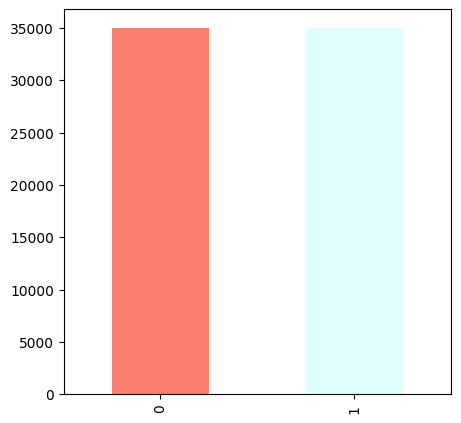

In [32]:
data["cardio"].value_counts().plot.bar(color=("salmon","lightcyan"), figsize=(5,5));

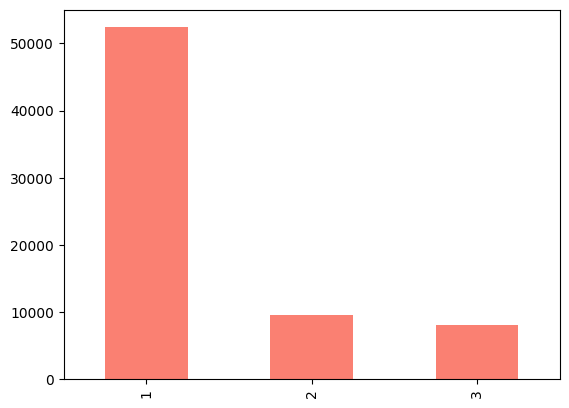

In [33]:
data["cholesterol"].value_counts().plot.bar(color="salmon");

In [34]:
pd.crosstab(data["cardio"], data["cholesterol"])

cholesterol,1,2,3
cardio,,,
0,29330,3799,1892
1,23055,5750,6174


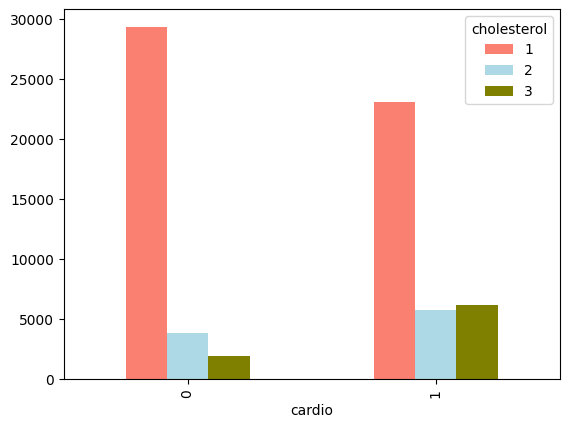

In [35]:
pd.crosstab(data["cardio"], data["cholesterol"]).plot(kind="bar",
                                                      color=("Salmon", "lightblue", "olive"));

In [36]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,1,168,62.0,110,80,1,1,0,0,1,0
1,55.0,0,156,85.0,140,90,3,1,0,0,1,1
2,52.0,0,165,64.0,130,70,3,1,0,0,0,1
3,48.0,1,169,82.0,150,100,1,1,0,0,1,1
4,48.0,0,156,56.0,100,60,1,1,0,0,0,0


In [37]:
pd.crosstab(data["cardio"], data["alco"])

alco,0,1
cardio,,
0,33080,1941
1,33156,1823


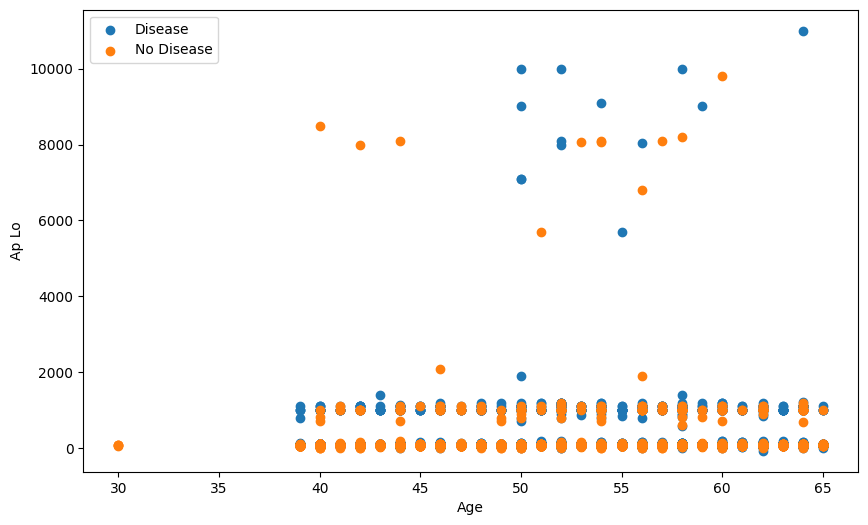

In [38]:
plt.figure(figsize=(10,6))

plt.scatter(data.age[data["cardio"]==1],
            data.ap_lo[data["cardio"]==1])

plt.scatter(data.age[data["cardio"]==0],
            data.ap_lo[data["cardio"]==0]);

plt.xlabel("Age");
plt.ylabel("Ap Lo");
plt.legend(["Disease", "No Disease"]);

In [39]:
trainSet, testSet, header = train_test_split(data)
x_train = trainSet.drop(labels='cardio', axis=1)
y_train = trainSet['cardio']
x_test = testSet.drop(labels='cardio', axis=1)
y_test = testSet['cardio']

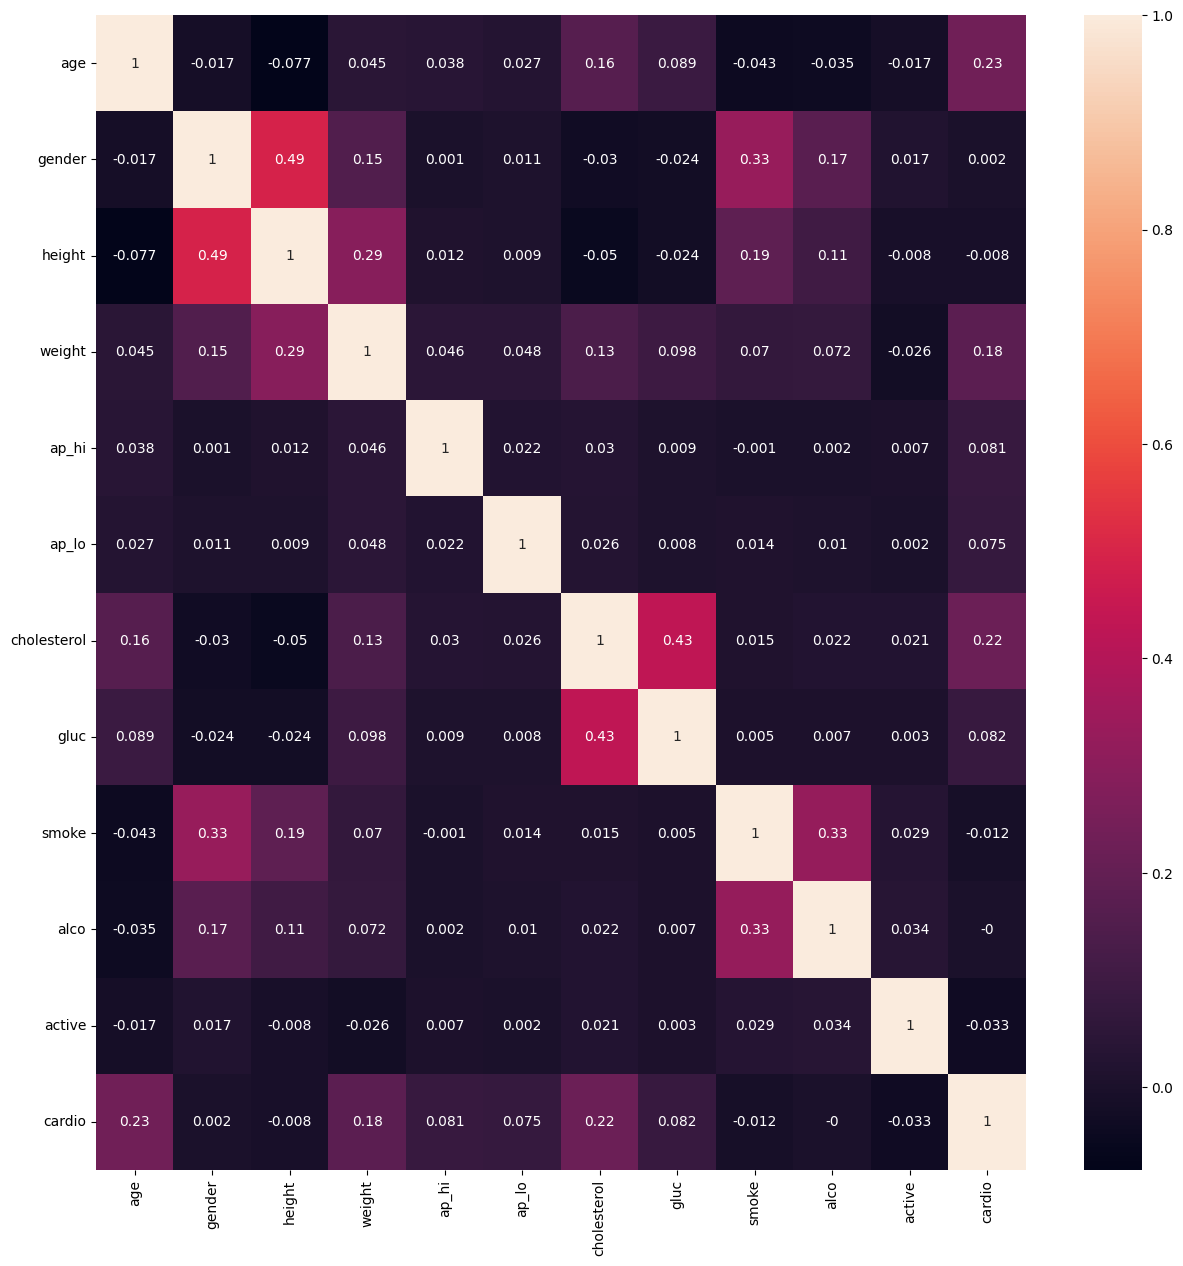

In [40]:
corr = []
corr_matrix = []

for i in header:
    tmp = []
    for j in header:
        tmp.append(round(correlation(trainSet[i], trainSet[j]), 3))
    corr.append(tmp)

corr = pd.DataFrame(data=corr, index=header, columns=header)

sns.heatmap(corr, annot=True)
fig = plt.gcf()
fig.set_size_inches(15, 15)
plt.show()

In [41]:
data.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [42]:
X = data.drop("cardio", axis=1)
y = data["cardio"]

len(X), len(y)

(70000, 70000)

In [43]:
models = {
    "Linear Regression": LinearRegression(),
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    # "Decision Tree": DecisionTreeClassifier(),
}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [44]:
models_scores = fit_and_score(models=models,
                             X_train=x_train,
                             X_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
models_scores

c:\Users\FPT Shop\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Linear Regression': 0.11634521751699889,
 'Logistic Regression': 0.7150178571428571,
 'KNN': 0.6861428571428572}

In [45]:
train_scores = []
test_scores = []


neighbors = range(1,21)
# Knn
knn_clf = KNeighborsClassifier()


for i in neighbors:
    
    knn_clf.set_params(n_neighbors=i)
    
    knn_clf.fit(x_train, y_train)
    
    train_scores.append(knn_clf.score(x_train, y_train))
    
    test_scores.append(knn_clf.score(x_test, y_test))

KNN : 71.22%


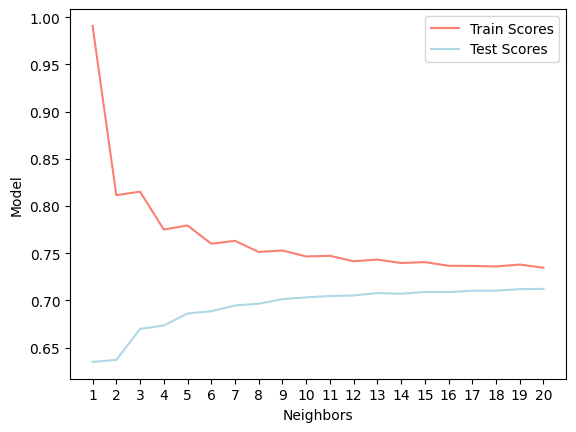

In [46]:
plt.plot(neighbors,train_scores, color="salmon", label="Train Scores");
plt.plot(neighbors,test_scores, color="lightblue", label="Test Scores");

plt.xlabel("Neighbors")
plt.ylabel("Model")
plt.xticks(np.arange(1,21,1))
plt.legend();

print(f"KNN : {max(test_scores)*100:.2f}%")

In [47]:
numOfRightAnswer = 0
for item in testSet.values:
    knn = kNearestNeighbor(trainSet, item, 5)
    answer = findMostOccur(knn)
    numOfRightAnswer += item[-1] == answer
    # print("Thực tế: {} -> Dự đoán: {}".format(item[-1], answer))
print("Độ chính xác:", numOfRightAnswer / len(testSet))
print(numOfRightAnswer)

Độ chính xác: 0.7395178571428571
41413
